In [66]:
import matplotlib.pyplot as plt

# Function to generate a bracelet modulo n with initial numbers a and b 
def generate_bracelet(a, b, n):
    bracelet = [a, b]
    while True:
        next_number = (bracelet[-2] + bracelet[-1]) % n
        bracelet.append(next_number)
        
        # Check if the last two numbers are the same as the first two
        if bracelet[-2] == a and bracelet[-1] == b:
            break

    return bracelet

# Finds a pair of numbers modulo n which are not in the given bracelet
def find_missing_pair(a, b, n):
    bracelet = generate_bracelet(a, b, n)
    pairs = set(zip(bracelet, bracelet[1:]))

    for i in range(n):
        for j in range(n):
            if (i, j) not in pairs:
                return (i, j)

    return None

# Creates all bracelets by making a new bracelet for each pair which has not been used in any previous bracelet
def combined_process(a, b, n):
    all_bracelets = []
    pairs_covered = set()

    # Generate the initial bracelet
    initial_bracelet = generate_bracelet(a, b, n)
    all_bracelets.append(initial_bracelet)
    pairs_covered.update(zip(initial_bracelet, initial_bracelet[1:]))

    # Generate a list of all possible pairs
    all_pairs = {(i, j) for i in range(n) for j in range(n)}

    while pairs_covered != all_pairs:
        for pair in all_pairs - pairs_covered:
            current_bracelet = generate_bracelet(pair[0], pair[1], n)
            pairs_covered.update(zip(current_bracelet, current_bracelet[1:]))
            all_bracelets.append(current_bracelet)
            break

    return all_bracelets

# Example usage
a = 1
b = 5
n = 10
all_bracelets = combined_process(a, b, n)
total_length = 0

# Print all bracelets and calculate their total length
for i, seq in enumerate(all_bracelets):
    #Subtract 2 from the length of the sequences as the last 2 elements are the same as the first two
    bracelet_length = len(seq) - 2
    total_length += bracelet_length
    print(f"Bracelet {i+1}: {seq} (Length: {bracelet_length})")

print("Total length of all bracelets:", total_length)


Bracelet 1: [1, 5, 6, 1, 7, 8, 5, 3, 8, 1, 9, 0, 9, 9, 8, 7, 5, 2, 7, 9, 6, 5, 1, 6, 7, 3, 0, 3, 3, 6, 9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, 0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, 0, 7, 7, 4, 1, 5] (Length: 60)
Bracelet 2: [4, 0, 4, 4, 8, 2, 0, 2, 2, 4, 6, 0, 6, 6, 2, 8, 0, 8, 8, 6, 4, 0] (Length: 20)
Bracelet 3: [3, 4, 7, 1, 8, 9, 7, 6, 3, 9, 2, 1, 3, 4] (Length: 12)
Bracelet 4: [5, 5, 0, 5, 5] (Length: 3)
Bracelet 5: [8, 4, 2, 6, 8, 4] (Length: 4)
Bracelet 6: [0, 0, 0] (Length: 1)
Total length of all bracelets: 100


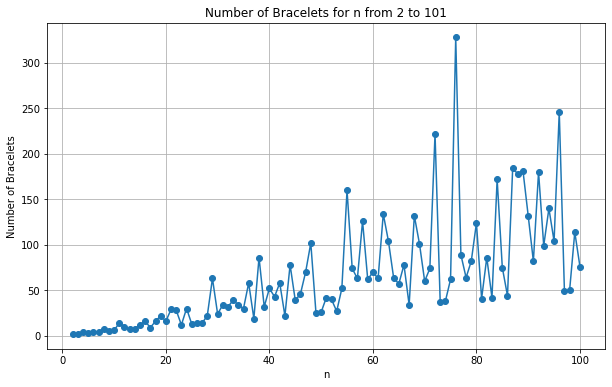

In [65]:
# Compute the number of bracelets modulo n for each n from 2 to 100
n_values = list(range(2, 101))
bracelet_counts = [len(combined_process(1, 1, n)) for n in n_values]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(n_values, bracelet_counts, marker='o')
plt.title("Number of Bracelets for n from 2 to 101")
plt.xlabel("n")
plt.ylabel("Number of Bracelets")
plt.grid(True)
plt.show()